In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR

In [8]:
np.random.seed(0)
#分别生成两个20*2维正态数组，其中第一个以[-2,-2]为中心,第二个以[2,2]为中心
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
#np.r_表示按列连接两个矩阵
#生成类别变量y，前20个为0，后20个为1
y = [0] * 20 + [1] * 20

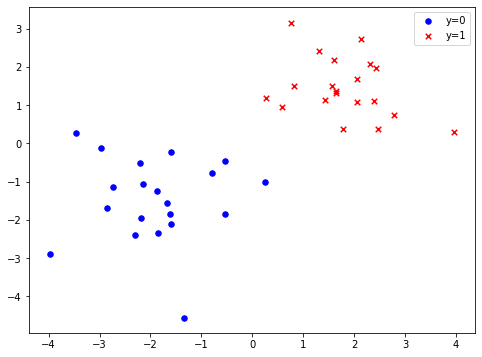

In [9]:
fig, ax = plt.subplots(figsize=(8,6))  #创建子图，大小为8*5
#构建y=0的散点图，设置散点形状为o
ax.scatter(X[0:20,1], X[0:20,0], s=30, c='b', marker='o', label='y=0')
#构建y=1的散点图，设置散点形状为x
ax.scatter(X[20:40,1], X[20:40,0], s=30, c='r', marker='x', label='y=1')
ax.legend()  #设置图例
plt.show()

In [10]:
clf = SVC(kernel='linear') ##设定模型为线性核函数的SVM
clf.fit(x, y)  #训练数据

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
print(clf.coef_)  #查看拟合模型的w
print(clf.support_vectors_)  #查看支撑向量
print(clf.predict(X))  #预测y
print(clf.score(X, y))  #查看SVM预测精度

[[0.90230696 0.64821811]]
[[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
1.0


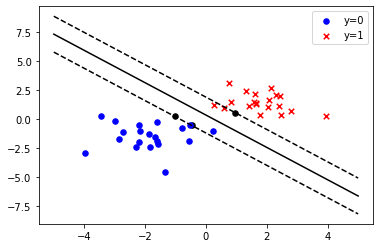

In [13]:
w = clf.coef_[0]  #获取参数w
a = -w[0] / w[1]  #获取斜率
xx = np.linspace(-5, 5) #生成xx为-5到5之间步长为1的数组
yy = a * xx - (clf.intercept_[0]) / w[1]  #生成超平面yy

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]  #获取支持向量第一列
yy_down = a * xx + (b[1] - a * b[0])  #生成下方yy
b = clf.support_vectors_[-1]  #获取支持向量第二列
yy_up = a * xx + (b[1] - a * b[0])  #生成上方的yy

plt.plot(xx, yy, 'k-')  #绘制超平面
plt.plot(xx, yy_down, 'k--')  #绘制超平面下方的直线
plt.plot(xx, yy_up, 'k--')  #绘制超平面上方的直线

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],c='black', s=30, facecolors='none')  #绘制支持向量的散点
#构建y=0的散点图，设置散点形状为o，cmap=plt.cm.Paired表示绘图样式选择Paired主题
plt.scatter(X[0:20,1], X[0:20,0], s=30, c='b', marker='o', label='y=0',cmap=plt.cm.Paired)
#构建y=1的散点图，设置散点形状为x
plt.scatter(X[20:40,1], X[20:40,0], s=30, c='r', marker='x', label='y=1',cmap=plt.cm.Paired)
plt.legend()  #设置图例
plt.show()

In [14]:
np.random.seed(2)  #固定随机种子数
#分别生成两个20*2维正态数组，其中第一个以[-1,-1]为中心,第二个以[1,1]为中心
X_n = np.r_[np.random.randn(20, 2) - [1, 1], np.random.randn(20, 2) + [1, 1]]
#np.r_表示按列连接两个矩阵
y_n = [0] * 20 + [1] * 20

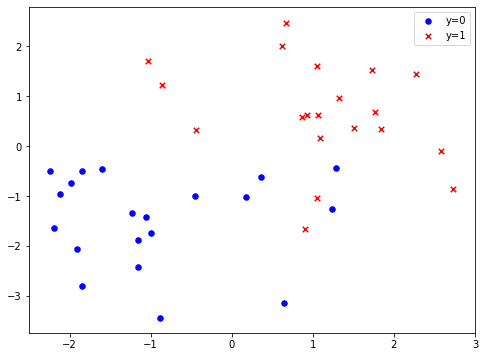

In [15]:
fig, ax = plt.subplots(figsize=(8,6))  #创建子图，大小为8*5
#构建y=0的散点图，设置散点形状为o
ax.scatter(X_n[0:20,1], X_n[0:20,0], s=30, c='b', marker='o', label='y=0')
#构建y=1的散点图，设置散点形状为x
ax.scatter(X_n[20:40,1], X_n[20:40,0], s=30, c='r', marker='x', label='y=1')
ax.legend()  #设置图例
plt.show()

In [16]:
clf_n = SVC(kernel='linear') ##设定模型为线性核函数的SVM
clf_n.fit(X_n, y_n)  #训练数据

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
print(clf_n.coef_)  #查看拟合模型的w
print(clf_n.support_vectors_)  #查看支撑向量
print(clf_n.predict(X_n))  #预测y
print(clf_n.score(X_n, y_n))  #查看SVM预测精度

[[1.00815375 0.5853258 ]]
[[-0.44854596  1.29220801]
 [-1.0191305   0.17500122]
 [-1.26905696  1.23136679]
 [-0.62955546  0.35963386]
 [-0.99999024 -0.45764743]
 [-0.86809065  2.73118467]
 [ 1.21611601 -0.85861239]
 [-1.04032305  1.04625552]
 [ 0.32232442 -0.43943903]
 [-1.65944946  0.90854738]]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1]
0.925


In [18]:
clf_nSV = SVC(kernel='linear',C=0.2) ##设定模型为线性核函数的SVM
clf_nSV.fit(X_n, y_n)  #训练数据

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
print(clf_nSV.coef_)  #查看拟合模型的w
print(clf_nSV.support_vectors_)  #查看支撑向量
print(clf_nSV.predict(X_n))  #预测y
print(clf_nSV.score(X_n, y_n))  #查看SVM预测精度

[[0.72864141 0.49610471]]
[[-0.44854596  1.29220801]
 [-0.46094168 -1.5961597 ]
 [-1.0191305   0.17500122]
 [-1.26905696  1.23136679]
 [-0.62955546  0.35963386]
 [-0.99999024 -0.45764743]
 [-0.86809065  2.73118467]
 [ 0.17086471  1.08771022]
 [ 1.21611601 -0.85861239]
 [-1.04032305  1.04625552]
 [ 0.32232442 -0.43943903]
 [-1.65944946  0.90854738]
 [ 1.69511961 -1.03346655]]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1]
0.95


In [20]:
# 非线性可分与多分类  
df = pd.read_csv('../data/traffic.csv') #读取csv数据
df.head()  #展示前五行数据

,red,area,width,density,land,cbd,traffic
0,1,450,18,0,0,3,2
1,1,260,14,0,0,3,2
2,1,295,18,0,0,3,1
3,2,286,16,1,0,0,2
4,0,520,14,0,0,3,2


Text(0, 0.5, 'width')

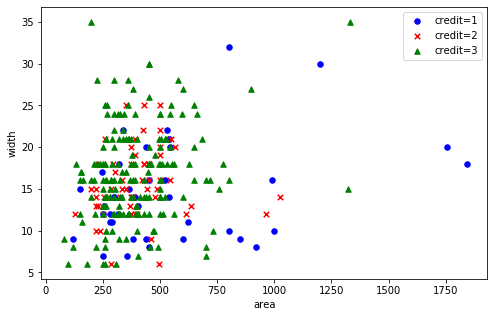

In [21]:
#对训练集中的数据进行可视化
a1 = df[df['traffic'] == 0] #把admit为0的数据筛选出来形成单独的数据集
a2 = df[df['traffic'] == 1] #把admit为1的数据筛选出来形成单独的数据集  
a3 = df[df['traffic'] == 2] #把credit为2的数据筛选出来形成单独的数据集

fig, ax = plt.subplots(figsize=(8,5))  #创建子图，大小为8*5
ax.scatter(a1['area'], a1['width'], s=30, c='b', marker='o', label='credit=1')
#构建a1的散点图，设置散点形状为o
ax.scatter(a2['area'], a2['width'], s=30, c='r', marker='x', label='credit=2')  
#构建a2的散点图，设置散点形状为x
ax.scatter(a3['area'], a3['width'], s=30, c='g', marker='^', label='credit=3')  
#构建a3的散点图，设置散点形状为x
ax.legend()  #设置图例
ax.set_xlabel('area')  #设置x轴标签
ax.set_ylabel('width')  #设置y轴标签

In [22]:
X_traf = df.iloc[:,0:6]  #取df的前5列为X变量
y_traf = df['traffic'] #设置y变量

# 把X、y转化为数组形式，以便于计算
X_traf = np.array(X_traf.values)  
y_traf = np.array(y_traf.values)

In [24]:
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X_traf,y_traf,test_size=0.25,random_state =2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210, 6), (71, 6), (210,), (71,))

In [25]:
clf_traf = SVC(kernel='rbf', gamma=1.0,decision_function_shape='ovo')

In [26]:
clf_traf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
print(clf_traf.support_vectors_)  #查看支撑向量

[[  1. 120.   9.   0.   0.   3.]
 [  1. 358.   7.   0.   0.   0.]
 [  2. 364.  15.   0.   0.   3.]
 ...
 [  0. 225.  28.   0.   0.   4.]
 [  0. 100.   6.   2.   0.   2.]
 [  2. 450.  20.   1.   1.   3.]]


In [29]:
y_pred_traf =clf_traf.predict(X_test)  #预测测试集
y_pred_traf

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred_traf)  #计算准确率

0.6901408450704225

In [31]:
confusion_matrix(y_true=y_test, y_pred=y_pred_traf)  #计算混淆矩阵

array([[ 0,  0, 12],
       [ 0,  0, 10],
       [ 0,  0, 49]], dtype=int64)

In [32]:
# 非线性可分
np.random.seed(3)  #固定随机种子数
#分别生成两个20*2维抛物线式正态数组，其中第一个以[-1,-1]为中心,第二个以[1,1]为中心
X_sq = np.r_[np.random.randn(20, 2)**2 - [1, 1], np.random.randn(20, 2)**2 + [1, 1]]
#np.r_表示按列连接两个矩阵
y_sq = [0] * 20 + [1] * 20

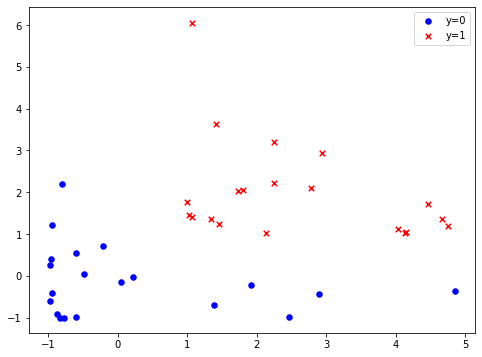

In [33]:
fig, ax = plt.subplots(figsize=(8,6))  #创建子图，大小为8*5
#构建y=0的散点图，设置散点形状为o
ax.scatter(X_sq[0:20,1], X_sq[0:20,0], s=30, c='b', marker='o', label='y=0')
#构建y=1的散点图，设置散点形状为x
ax.scatter(X_sq[20:40,1], X_sq[20:40,0], s=30, c='r', marker='x', label='y=1')
ax.legend()  #设置图例
plt.show()

In [34]:
clf_sq = SVC( kernel='poly', degree=2)  #核函数为多项式的SVM
clf_sq.fit(X_sq, y_sq)  #拟合样本

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
print(clf_sq.support_vectors_)  #查看支撑向量
print(clf_sq.predict(X_sq))  #预测y
print(clf_sq.score(X_sq, y_sq))  #查看SVM预测精度

[[ 2.19919182 -0.80945915]
 [-0.92305579 -0.87414607]
 [-0.99315385 -0.60687015]
 [-0.99807997 -0.77226295]
 [-0.99749663 -0.83623619]
 [-0.60906873 -0.97423546]
 [-0.40889067 -0.94708587]
 [-0.35396007  4.8519634 ]
 [ 1.35599079  1.34644334]
 [ 1.76367027  1.00088291]
 [ 1.45525721  1.02268544]
 [ 1.02339239  2.13251158]
 [ 1.23405117  1.45726862]
 [ 1.41365901  1.06204419]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1]
0.925


In [36]:
clf_rbf = SVC( kernel='rbf',gamma=1) #核函数为径向基的SVM
clf_rbf.fit(X_sq, y_sq)   #拟合样本

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
print(clf_rbf.support_vectors_)  #查看支撑向量
print(clf_rbf.predict(X_sq))  #预测y
print(clf_rbf.score(X_sq, y_sq))  #查看SVM预测精度

[[ 2.19919182 -0.80945915]
 [-0.99068824  2.47260506]
 [-0.99315385 -0.60687015]
 [ 0.72624059 -0.21744324]
 [-0.22327851  1.92264006]
 [-0.99749663 -0.83623619]
 [-0.70258253  1.39159209]
 [-0.03495422  0.21234993]
 [ 1.20863693 -0.94396541]
 [-0.44489116  2.90501383]
 [-0.35396007  4.8519634 ]
 [ 0.26332645 -0.98259864]
 [ 3.63505564  1.41818914]
 [ 1.76367027  1.00088291]
 [ 6.05466299  1.07169642]
 [ 2.22807954  2.25303544]
 [ 3.21278457  2.25059642]
 [ 1.71543415  4.46290984]
 [ 2.09861321  2.77885657]
 [ 1.45525721  1.02268544]
 [ 1.02339239  2.13251158]
 [ 1.19179723  4.75963747]
 [ 1.02387237  4.13158079]
 [ 2.94815576  2.93672565]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
1.0


In [38]:
clf_sig = SVC( kernel='sigmoid',gamma=1)  #核函数为sigmoid的SVM
clf_sig.fit(X_sq, y_sq)   #拟合样本
print(clf_sig.support_vectors_)  #查看支撑向量
print(clf_sig.predict(X_sq))  #预测y
print(clf_sig.score(X_sq, y_sq))  #查看SVM预测精度

[[ 2.19919182 -0.80945915]
 [-0.99068824  2.47260506]
 [ 0.72624059 -0.21744324]
 [-0.22327851  1.92264006]
 [-0.70258253  1.39159209]
 [ 1.20863693 -0.94396541]
 [-0.44489116  2.90501383]
 [ 0.54784286 -0.60760185]
 [-0.35396007  4.8519634 ]
 [ 1.35599079  1.34644334]
 [ 1.76367027  1.00088291]
 [ 2.02654069  1.72726416]
 [ 2.22807954  2.25303544]
 [ 3.21278457  2.25059642]
 [ 1.45525721  1.02268544]
 [ 2.0504833   1.80880964]
 [ 1.23405117  1.45726862]
 [ 1.41365901  1.06204419]
 [ 2.94815576  2.93672565]]
[1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 0]
0.675


In [40]:
# SVM回归
np.random.seed(4)  #固定随机种子数
#分别生成40*2维正态数组
X_l = np.random.randn(40, 2)
#生成连续型变量y，前20个为0，中间20个为1,后20个为2
y_l =  X_l[:,0] + 2 *  X_l[:,1] + np.random.randn(40)

y_l

array([-0.04665751, -0.13690798, -5.96723126, -0.05824011, -3.03799332,
        2.4651009 ,  0.52470339, -1.99775101,  3.35791315,  0.64040222,
       -0.82552317, -2.06935718,  3.22126413, -0.90771151, -0.13148504,
        0.95692445, -5.16395954,  0.39862405,  2.97318418,  1.59768512,
        0.61428811, -0.71542727,  2.08820922,  1.97447262,  3.05518637,
       -3.10233113,  0.13947067, -0.75609834, -0.26190011,  0.87014576,
        5.21345028, -0.97121169, -3.30937728, -0.45735683,  2.72240804,
        2.52940687,  2.64539592,  0.38237096,  0.56863715,  0.03228976])

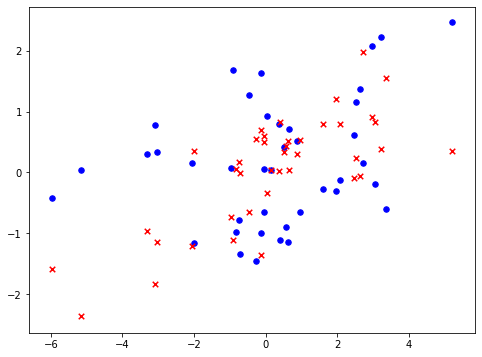

In [41]:
fig, ax = plt.subplots(figsize=(8,6))  #创建子图，大小为8*5
#构建y_l与X_l[:,0]的散点图，设置散点形状为o
ax.scatter(y_l, X_l[:,0], s=30, c='b', marker='o')
#构建y_l与X_l[:,1]的散点图，设置散点形状为x
ax.scatter(y_l, X_l[:,1], s=30, c='r', marker='x')
plt.show()

In [42]:
clf_l = SVR() ##设定模型为线性核函数的SVM
clf_l.fit(X_l, y_l)  #训练数据

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
print(clf_l.support_vectors_)  #查看支撑向量
print(clf_l.score(X_l, y_l))  #查看SVM预测精度

[[ 0.05056171  0.49995133]
 [-0.99590893  0.69359851]
 [-0.41830152 -1.58457724]
 [-0.64770677  0.59857517]
 [ 0.33225003 -1.14747663]
 [ 0.61866969 -0.08798693]
 [ 0.4250724   0.33225315]
 [-1.15681626  0.35099715]
 [-0.60688728  1.54697933]
 [-0.98299165  0.05443274]
 [ 0.15989294 -1.20894816]
 [ 2.22336022  0.39429521]
 [ 1.69235772 -1.11281215]
 [ 1.63574754 -1.36096559]
 [-0.65122583  0.54245131]
 [ 0.04800625 -2.35807363]
 [-1.10558404  0.83783635]
 [ 2.08787087  0.91484096]
 [-0.27620335  0.7965119 ]
 [-1.14379857  0.50991978]
 [-0.13070464  0.80208661]
 [-0.30296397  1.20200259]
 [-0.19674528  0.8365287 ]
 [ 0.78660228 -1.84087587]
 [ 0.03754749  0.03592805]
 [-0.77873992  0.17941071]
 [ 0.50977885  0.30044554]
 [ 2.47658416  0.3523434 ]
 [ 0.067471   -0.7322647 ]
 [ 0.29714121 -0.9617768 ]
 [ 1.27181862 -0.64764453]
 [ 0.15846954  1.99008302]
 [ 1.16418756  0.24266016]
 [ 1.3799201  -0.05455871]
 [ 0.79523395  0.01908996]
 [-0.90543814  0.43027133]]
0.7499873545010536


In [44]:
y_hat = clf_l.predict(X_l)  #预测y

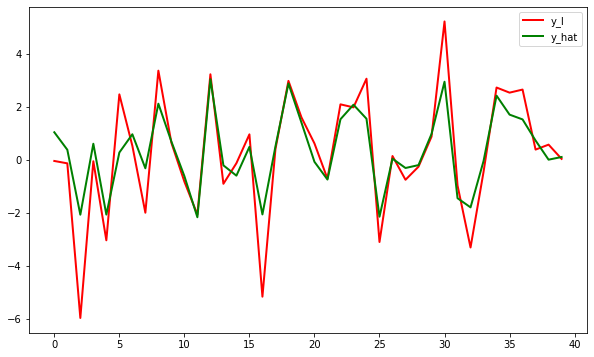

In [45]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(X_l))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_l, 'r', linewidth=2, label='y_l') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [46]:
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_l, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_l, y_hat))
# 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_l, y_hat)))

MAE: 0.7699791949170566
MSE: 1.314078470236033
RMSE: 1.1463326176272022
